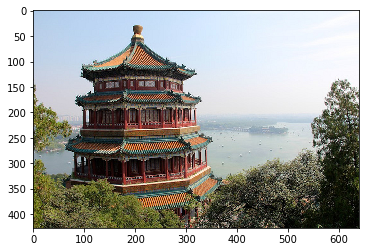

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

china = load_sample_image("china.jpg")
image = china /255
plt.imshow(image)

In [2]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [21]:
X=image.reshape(-1, 3)                 #임의의 숫자 8로 우선 segment를 해보겠습니다.
kmeans = KMeans(n_clusters=8).fit(X)

In [12]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

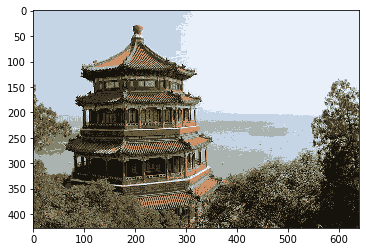

In [13]:
plt.imshow(segmented_img)

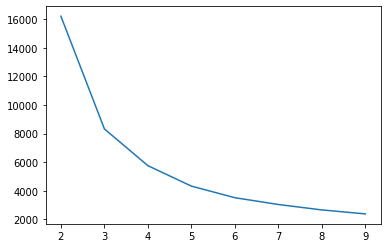

In [14]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    kiner[k] = kmeans.inertia_ 

plt.plot(list(kiner.keys()), list(kiner.values()))

## 3과 4 부분에서 급격히 기울기가 변한다고 판단이 됩니다.

In [15]:
kiner

{2: 16200.478799583067,
 3: 8320.816267532144,
 4: 5751.961302754323,
 5: 4321.063402073931,
 6: 3510.407404775853,
 7: 3035.375119245021,
 8: 2656.0649777585995,
 9: 2376.3184263477297}

## n=3 일 때, cluster의 최적의 갯수로 판단하고, image를 segment 해보겠습니다.

$\because$ kiner[3]-kiner[2]에서 가장 큰 차이를 보이고 있기 때문입니다.

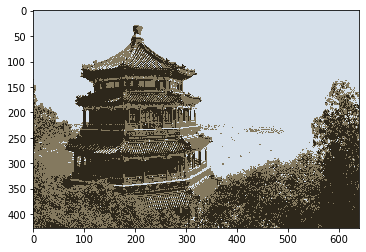

In [20]:
kmeans = KMeans(n_clusters=3).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)